<!-- Codes by HTMLcodes.ws -->
<h1 style = "color:Blue;font-family:newtimeroman;font-size:250%;text-align:Center;border-radius:15px 50px;">Predicting Ratings of Chocolate Bars with R</h1>

![image](https://media1.giphy.com/media/U5CcCHZl51BJTtdzt8/giphy.gif)

# **Introduction:**

The world of chocolate is a vast and diverse realm, offering an array of flavors, qualities, and origins. This dataset delves into the expert ratings of over 1,700 individual chocolate bars, shedding light on their regional origins, cocoa percentages, bean varieties, and growing locations.

Using the Flavors of Cacao Rating System, experts evaluate chocolates based on objective qualities and subjective interpretations. These ratings encapsulate the experiences with specific bars from particular batches, incorporating batch numbers, vintages, and review dates when available.

Focused primarily on plain dark chocolate, the database aims to appreciate the flavors derived from cacao during the chocolate-making process. It is important to note that the ratings provided do not reflect health benefits, social missions, or organic certifications.

The Flavors of Cacao ratings highlight the crucial role of flavor in chocolate evaluation, considering factors such as diversity, balance, intensity, and purity. A high rating can be given to chocolates with a straightforward single-note profile or those with complex flavor profiles that evolve during the tasting experience. The genetic makeup of cacao, terroir, post-harvest techniques, processing methods, and storage conditions all contribute to the flavor component.

Texture is a key element that influences the overall chocolate experience, impacting flavor and serving as a measure of the maker's skill and attention to detail.

The aftermelt, the experience after the chocolate melts in the mouth, holds equal importance in the overall rating. Superior chocolates tend to leave a lingering and enjoyable aftertaste, creating a lasting impression.

The Overall Opinion category represents the subjective evaluation of how the various components of chocolate harmonize. It encompasses impressions regarding flavor development, character, and style. Each chocolate can typically be summarized by the most prominent impressions it leaves on the taster.

Through this dataset, we embark on a delightful journey to understand and appreciate the nuances of chocolate, exploring its diverse flavors, origins, and intricate characteristics.

# **Load the required packages**

In [2]:
install.packages("psych")

In [3]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(data.table)
library(corrplot)
library(lubridate)
library(RColorBrewer)
library(psych)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


corrplot 0.92 loaded


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




# **Importing the Dataset** 

In [4]:
# Read the dataset into R
chocolate_data <- read.csv("/kaggle/input/chocolate-bar-ratings/flavors_of_cacao.csv")

* # Understanding the Structure of the Dataset

To get an overview of the dataset's structure and the first few rows.

In [5]:
head(chocolate_data)
str(chocolate_data)

,Company...Maker.if.known.,Specific.Bean.Origin.or.Bar.Name,REF,Review.Date,Cocoa.Percent,Company.Location,Rating,Bean.Type,Broad.Bean.Origin
,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>
1,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
3,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
6,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela


'data.frame':	1795 obs. of  9 variables:
 $ Company...Maker.if.known.       : chr  "A. Morin" "A. Morin" "A. Morin" "A. Morin" ...
 $ Specific.Bean.Origin.or.Bar.Name: chr  "Agua Grande" "Kpime" "Atsane" "Akata" ...
 $ REF                             : int  1876 1676 1676 1680 1704 1315 1315 1315 1319 1319 ...
 $ Review.Date                     : int  2016 2015 2015 2015 2015 2014 2014 2014 2014 2014 ...
 $ Cocoa.Percent                   : chr  "63%" "70%" "70%" "70%" ...
 $ Company.Location                : chr  "France" "France" "France" "France" ...
 $ Rating                          : num  3.75 2.75 3 3.5 3.5 2.75 3.5 3.5 3.75 4 ...
 $ Bean.Type                       : chr  " " " " " " " " ...
 $ Broad.Bean.Origin               : chr  "Sao Tome" "Togo" "Togo" "Togo" ...


In [6]:
dim(chocolate_data)

[1] 1795    9

In [7]:
# Check the column names in the dataset
colnames(chocolate_data)

[1] "Company...Maker.if.known."        "Specific.Bean.Origin.or.Bar.Name"
[3] "REF"                              "Review.Date"                     
[5] "Cocoa.Percent"                    "Company.Location"                
[7] "Rating"                           "Bean.Type"                       
[9] "Broad.Bean.Origin"

# Descriptive Statistics

Next, let's generate descriptive statistics for chocolate_data

In [8]:
# Generate descriptive statistics for chocolate_data
describe(chocolate_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Company...Maker.if.known.*,1,1795,207.623398,125.0998874,207.00,208.040362,163.08600,1,416,415,-3.036880e-02,-1.2687899,2.95273650
Specific.Bean.Origin.or.Bar.Name*,2,1795,525.454596,292.3305339,531.00,525.532359,354.34140,1,1039,1038,-5.850253e-05,-1.1577157,6.89988660
REF,3,1795,1035.904735,552.8863650,1069.00,1046.443981,677.54820,5,1952,1947,-1.412203e-01,-1.1456572,13.04979392
Review.Date,4,1795,2012.325348,2.9272103,2013.00,2012.543493,2.96520,2006,2017,11,-5.263536e-01,-0.7502661,0.06909103
Cocoa.Percent*,5,1795,22.859610,6.6168690,21.00,22.796799,4.44780,1,45,44,-6.398876e-03,1.6208140,0.15617816
Company.Location*,6,1795,38.912535,20.7763918,55.00,40.876827,2.96520,1,60,59,-5.032596e-01,-1.4637910,0.49038582
Rating,7,1795,3.185933,0.4780624,3.25,3.208594,0.37065,1,5,4,-5.779640e-01,1.1230801,0.01128372
Bean.Type*,8,1795,14.042340,14.0890381,7.00,12.886569,7.41300,1,42,41,5.725967e-01,-1.4328748,0.33254400
Broad.Bean.Origin*,9,1795,44.267967,29.2892402,44.00,42.978427,32.61720,1,101,100,3.965861e-01,-0.9737345,0.69131484


# **Summary Statistics**

In [9]:
summary(chocolate_data)

 Company...Maker.if.known. Specific.Bean.Origin.or.Bar.Name      REF      
 Length:1795               Length:1795                      Min.   :   5  
 Class :character          Class :character                 1st Qu.: 576  
 Mode  :character          Mode  :character                 Median :1069  
                                                            Mean   :1036  
                                                            3rd Qu.:1502  
                                                            Max.   :1952  
  Review.Date   Cocoa.Percent      Company.Location       Rating     
 Min.   :2006   Length:1795        Length:1795        Min.   :1.000  
 1st Qu.:2010   Class :character   Class :character   1st Qu.:2.875  
 Median :2013   Mode  :character   Mode  :character   Median :3.250  
 Mean   :2012                                         Mean   :3.186  
 3rd Qu.:2015                                         3rd Qu.:3.500  
 Max.   :2017                                         M

# Exploring Categorical Variables

We can examine the distribution of categorical variables in the dataset. Let's analyze the "Company...Maker.if.known.", "Specific.Bean.Origin.or.Bar.Name", "Company.Location", "Bean.Type", and "Broad.Bean.Origin" columns. To view the frequency distribution of each category.

In [10]:
table(chocolate_data$Company...Maker.if.known.)
table(chocolate_data$Specific.Bean.Origin.or.Bar.Name)
table(chocolate_data$Company.Location)
table(chocolate_data$Bean.Type)
table(chocolate_data$Broad.Bean.Origin)


                               A. Morin                                  Acalli 
                                     23                                       2 
                                    Adi                      Aequare (Gianduja) 
                                      4                                       2 
                               Ah Cacao                      Akesson's (Pralus) 
                                      1                                       3 
                          Alain Ducasse                               Alexandre 
                                      5                                       4 
                  Altus aka Cao Artisan                                   Amano 
                                     10                                       9 
                  Amatller (Simon Coll)                                 Amazona 
                                      4                                       2 
                           


                  "heirloom", Arriba Nacional 
                                            2 
                                  100 percent 
                                            1 
                              2009 Hapa Nibby 
                                            1 
     A case of the Xerces Blues, triple roast 
                                            1 
                                       Abinao 
                                            1 
                                  ABOCFA Coop 
                                            1 
 Abstract S. w/ Jamaica nibs,batch abs60323.0 
                                            1 
                            Acarigua, w/ nibs 
                                            1 
                                     Acopagro 
                                            1 
                           Acul-du-Nord, 2015 
                                            1 
                                       Africa 
            


        Amsterdam         Argentina         Australia           Austria 
                4                 9                49                26 
          Belgium           Bolivia            Brazil            Canada 
               40                 2                17               125 
            Chile          Colombia        Costa Rica    Czech Republic 
                2                23                 9                 1 
          Denmark Domincan Republic           Ecuador           Eucador 
               15                 5                54                 1 
             Fiji           Finland            France           Germany 
                4                 2               156                35 
            Ghana           Grenada         Guatemala          Honduras 
                1                 3                10                 6 
          Hungary           Iceland             India           Ireland 
               22                 3               


                                                                    Amazon 
                       1                      887                        1 
              Amazon mix              Amazon, ICS                  Beniano 
                       2                        2                        3 
                   Blend  Blend-Forastero,Criollo                    CCN51 
                      41                        1                        1 
                 Criollo         Criollo (Amarru)     Criollo (Ocumare 61) 
                     153                        2                        2 
    Criollo (Ocumare 67)     Criollo (Ocumare 77)        Criollo (Ocumare) 
                       1                        1                        1 
     Criollo (Porcelana)           Criollo (Wild)               Criollo, + 
                      10                        1                        1 
      Criollo, Forastero      Criollo, Trinitario                      EET 
           


                                                            
                            1                            73 
    Africa, Carribean, C. Am.                     Australia 
                            1                             3 
                       Belize                       Bolivia 
                           49                            57 
                       Brazil                         Burma 
                           58                             1 
                     Cameroon                     Carribean 
                            1                             8 
        Carribean(DR/Jam/Tri)        Central and S. America 
                            1                             4 
                     Colombia             Colombia, Ecuador 
                           40                             3 
                        Congo                Cost Rica, Ven 
                           10                             1 
                   Cost

# Visualizing the Data

EDA often involves visualizing the data to gain insights. Here, we can create plots to visualize the relationships between variables. let's create a Box plot to examine the relationship between Rate and Bean Type and Density plot of ratings:

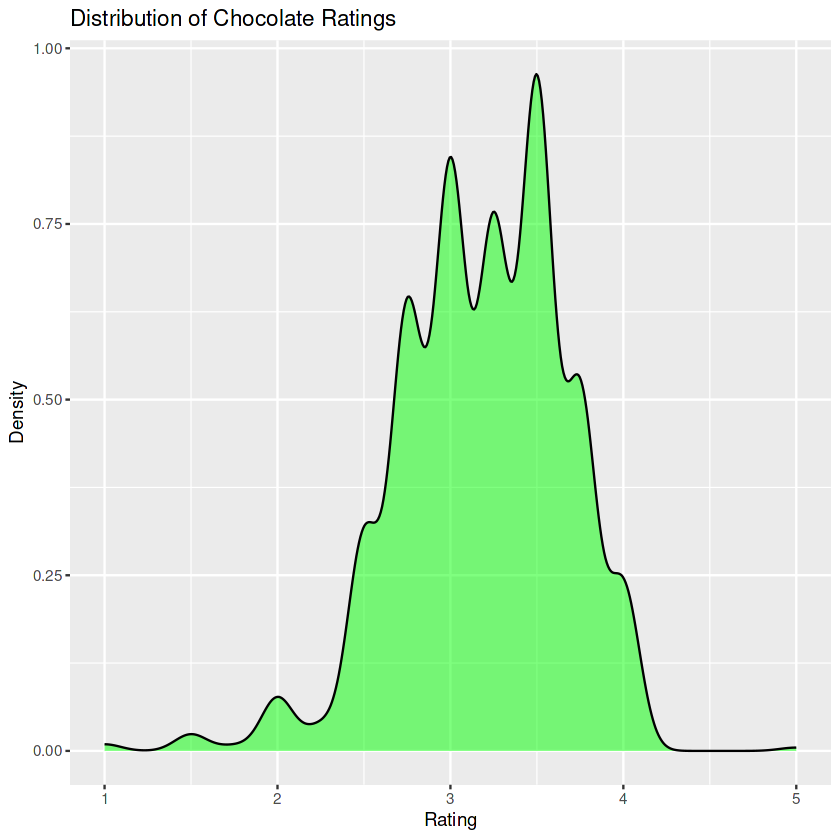

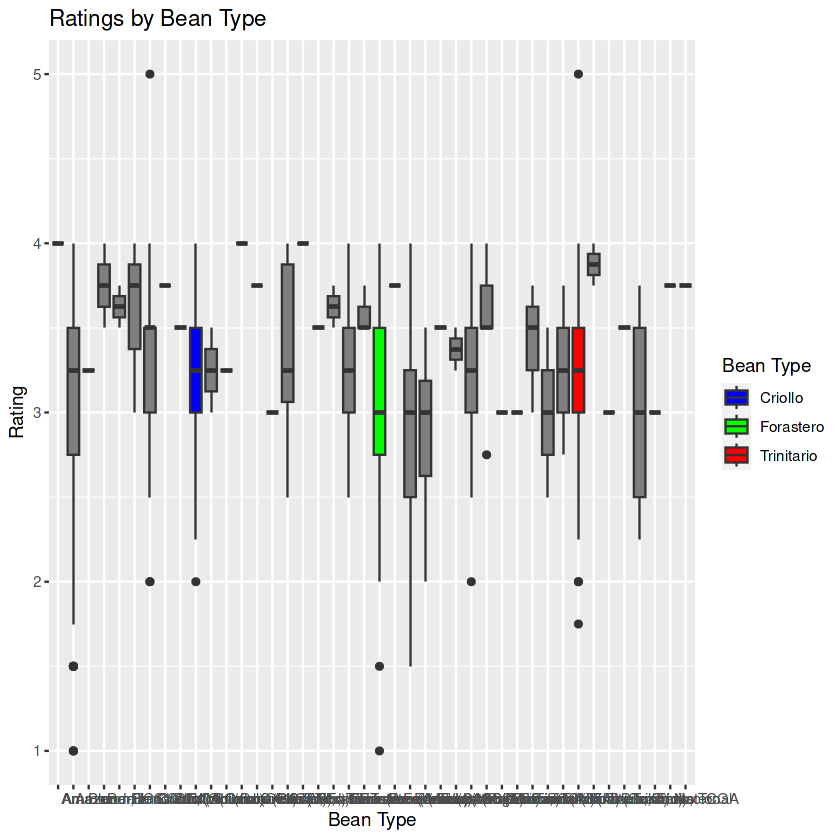

In [11]:
# Kernel density plot of ratings
ggplot(chocolate_data, aes(x = Rating)) +
  geom_density(fill = "green", alpha = 0.5) +
  labs(title = "Distribution of Chocolate Ratings", x = "Rating", y = "Density")

# Bar plot of average ratings by company location
Average_Ratings <- chocolate_data %>%
  group_by(Company.Location) %>%
  summarize(Average_Rating = mean(Rating, na.rm = TRUE))

# Create a custom color palette for the bean types
custom_colors <- c("Criollo" = "blue", "Trinitario" = "red", "Forastero" = "green")

ggplot(chocolate_data, aes(x = Bean.Type, y = Rating, fill = Bean.Type)) +
  geom_boxplot() +
  labs(title = "Ratings by Bean Type", x = "Bean Type", y = "Rating") +
  scale_fill_manual(values = custom_colors, name = "Bean Type")


let's create a scatterplot to examine the relationship between cocoa percentage and rating:

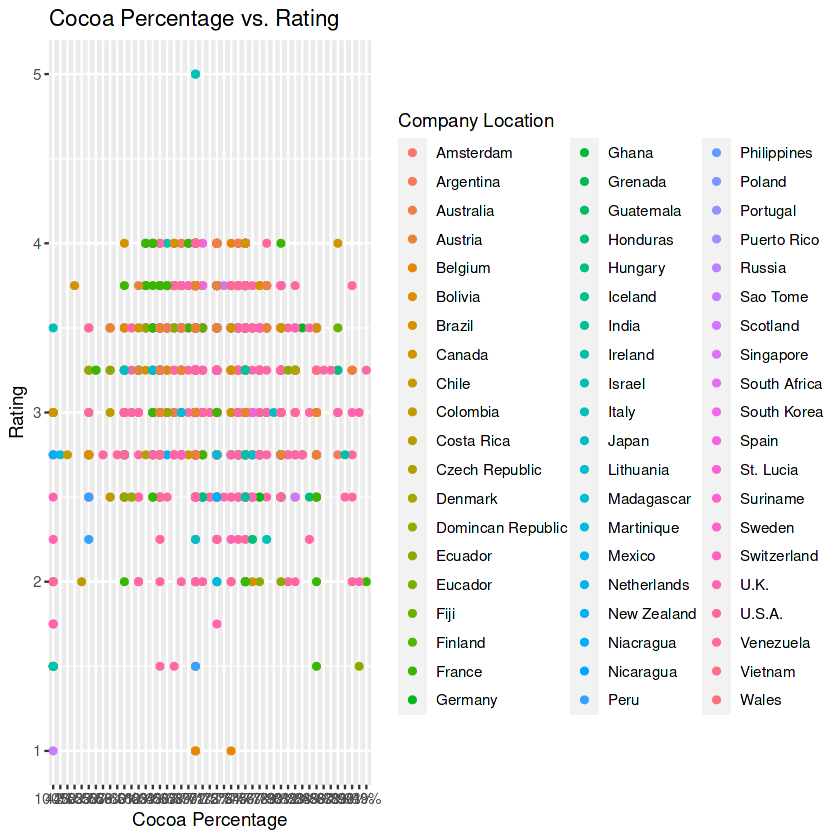

In [12]:
library(ggplot2)

ggplot(chocolate_data, aes(x = Cocoa.Percent, y = Rating, color = Company.Location)) + 
  geom_point() +
  labs(x = "Cocoa Percentage", y = "Rating") +
  ggtitle("Cocoa Percentage vs. Rating") +
  scale_color_discrete(name = "Company Location")


In [13]:
# Remove the % sign from the cocoa percent column
chocolate_data$Cocoa.Percent <- sapply(chocolate_data$Cocoa.Percent, function(x) gsub("%", "", x))

In [14]:
Average_Ratings <- chocolate_data %>% 
  group_by(Review.Date) %>% # Group by new date column
  summarise(Average_Rating = mean(Rating), n_Ratings = n()) # Summary stats

# Print our new table
Average_Ratings

Review.Date,Average_Rating,n_Ratings
<int>,<dbl>,<int>
2006,3.125000,72
2007,3.162338,77
2008,2.994624,93
2009,3.073171,123
2010,3.148649,111
2011,3.256061,165
2012,3.178205,195
2013,3.197011,184
2014,3.189271,247


let's create a bar plot to examine the relationship between Average Ratings and Review Date:

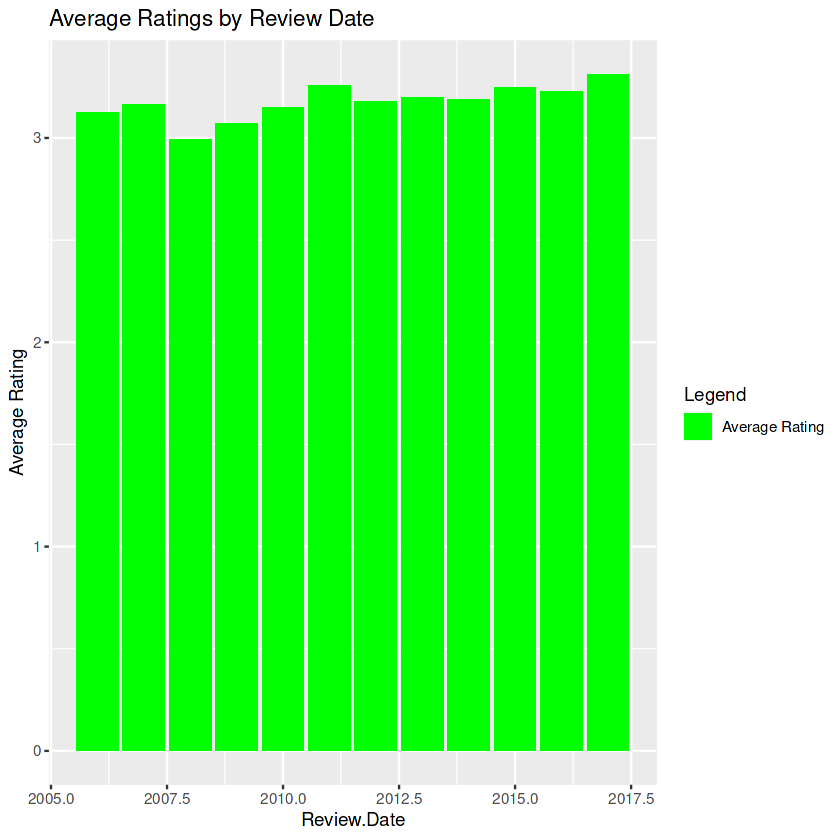

In [15]:
ggplot(Average_Ratings, aes(x = Review.Date, y = Average_Rating, fill = "Average Rating")) +
  geom_bar(stat = "identity") +
  labs(title = "Average Ratings by Review Date", x = "Review.Date", y = "Average Rating") +
  scale_fill_manual(values = "green", name = "Legend")


* # Where are the best cocoa beans grown? 

We can determine this by calculating the average ratings for each country and selecting the countries with the highest ratings.

In [16]:
class(chocolate_data$Cocoa.Percent)

[1] "character"

In [17]:
chocolate_data$Cocoa.Percent <- as.numeric(chocolate_data$Cocoa.Percent)

In [18]:
agg_persen <- aggregate(Cocoa.Percent ~ Broad.Bean.Origin, data = chocolate_data, FUN = mean)
head(agg_persen[order(-agg_persen$Cocoa.Percent), ], 3)

,Broad.Bean.Origin,Cocoa.Percent
,<chr>,<dbl>
60,"Peru, Ecuador",99
36,"Guat., D.R., Peru, Mad., PNG",88
69,Samoa,85


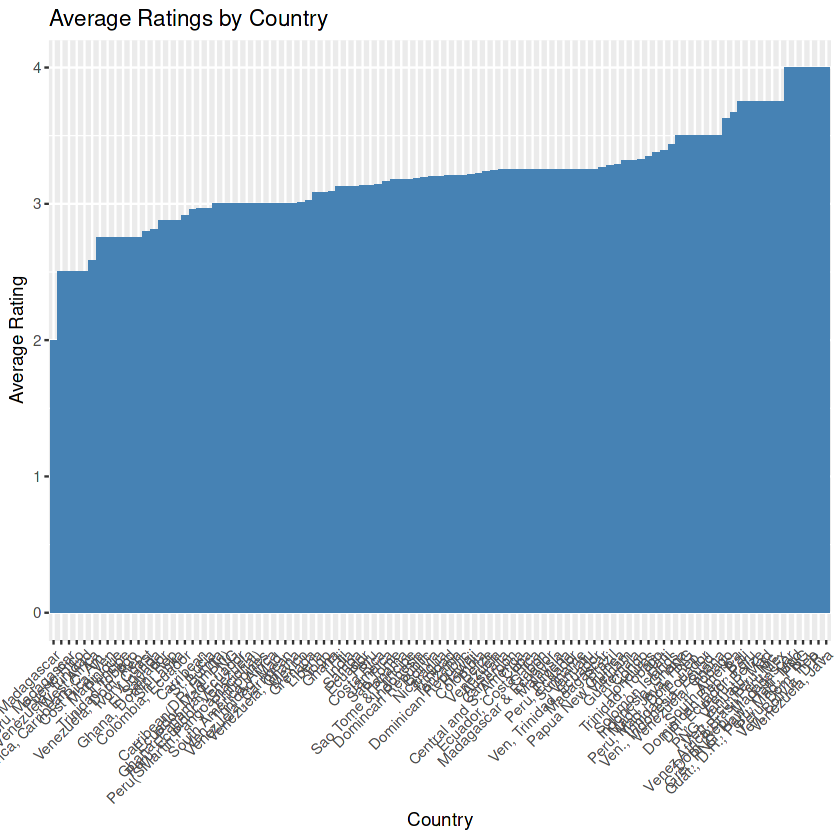

In [19]:
# Calculate the average rating for each country
country_ratings <- chocolate_data %>%
  group_by(Broad.Bean.Origin) %>%
  summarise(Average_Rating = mean(Rating, na.rm = TRUE)) %>%
  arrange(desc(Average_Rating))

# Plot the average ratings by country
ggplot(country_ratings, aes(x = reorder(Broad.Bean.Origin, Average_Rating), y = Average_Rating)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(x = "Country", y = "Average Rating", title = "Average Ratings by Country") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


A bar plot showing the average ratings for each country. The countries with higher bars indicate where the best cocoa beans are grown.

* # Which countries produce the highest-rated bars?

We can find the countries that produce bars with the highest ratings by calculating the average ratings for each specific bean origin or bar name.

In [20]:
agg_country_rate <- aggregate(Rating ~ Company.Location, data = chocolate_data, FUN = max)
head(agg_country_rate[order(-agg_country_rate$Rating),],3)

,Company.Location,Rating
,<chr>,<dbl>
30,Italy,5
3,Australia,4
5,Belgium,4


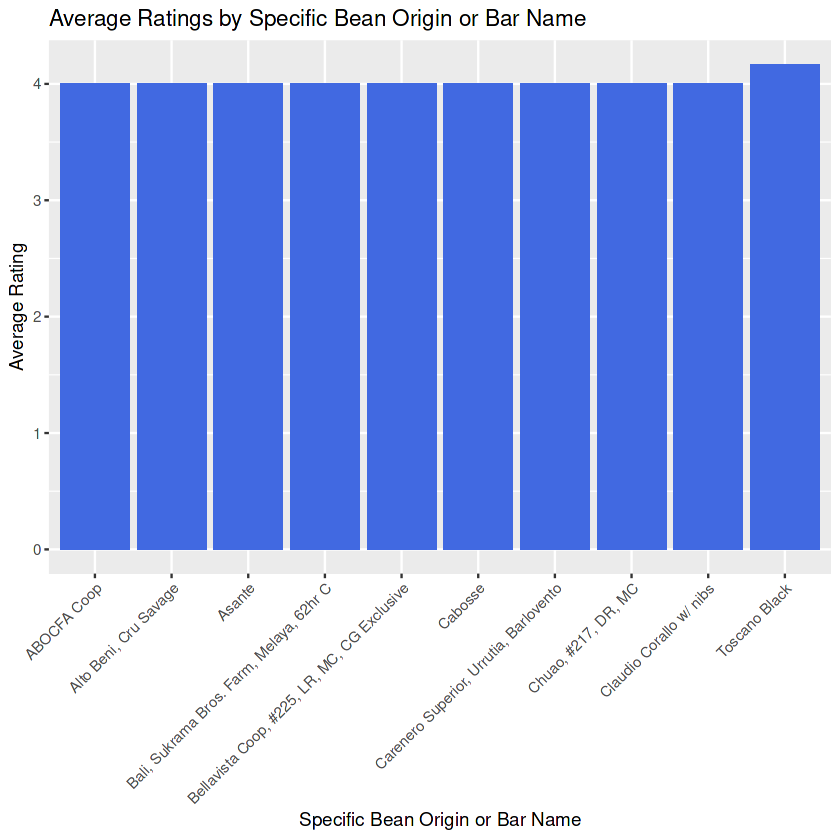

In [21]:
# Calculate the average rating for each specific bean origin or bar name
bar_ratings <- chocolate_data %>%
  group_by(Specific.Bean.Origin.or.Bar.Name) %>%
  summarise(Average_Rating = mean(Rating, na.rm = TRUE)) %>%
  arrange(desc(Average_Rating))

# Plot the average ratings by specific bean origin or bar name
ggplot(bar_ratings[1:10, ], aes(x = reorder(Specific.Bean.Origin.or.Bar.Name, Average_Rating), y = Average_Rating)) +
  geom_bar(stat = "identity", fill = "royalblue") +
  labs(x = "Specific Bean Origin or Bar Name", y = "Average Rating", title = "Average Ratings by Specific Bean Origin or Bar Name") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


A bar plot showing the average ratings for each specific bean origin or bar name. The bars of the highest countries indicate which countries produce the highest-rated bars.

* # What's the relationship between cocoa solids percentage and ratings?

We can create a scatter plot to visualize the relationship between these two variables.

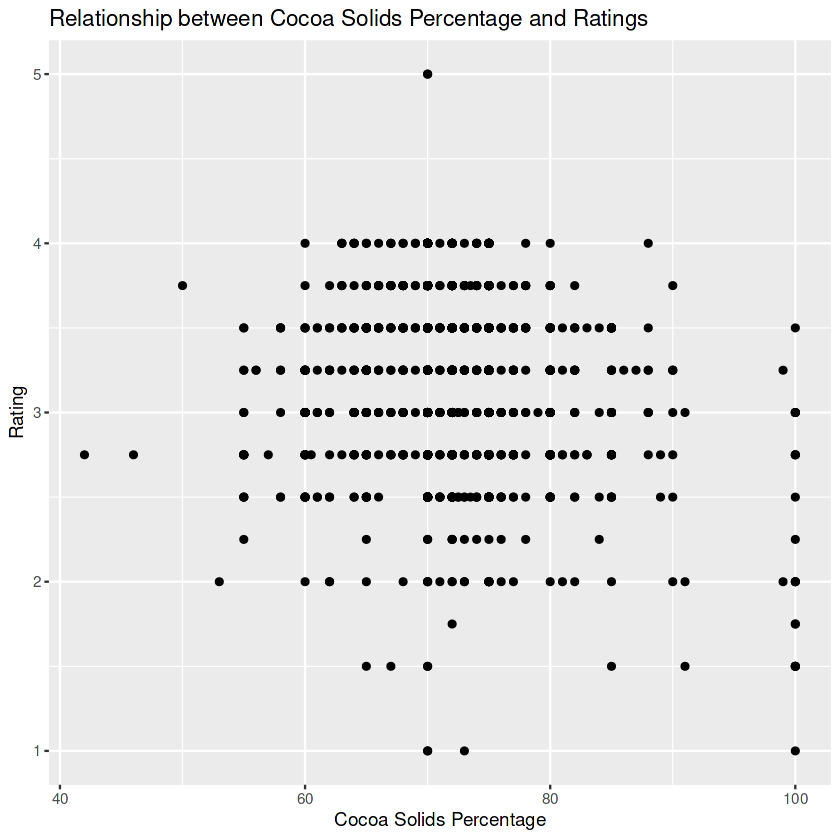

In [22]:
# Convert Cocoa.Percent to numeric
#chocolate_data$Cocoa.Percent <- parse_number(chocolate_data$Cocoa.Percent)

# Plot the relationship between Cocoa.Percent and Ratings
ggplot(chocolate_data, aes(x = Cocoa.Percent, y = Rating)) +
  geom_point() +
  labs(x = "Cocoa Solids Percentage", y = "Rating", title = "Relationship between Cocoa Solids Percentage and Ratings")


A scatter plot with Cocoa Solids Percentage on the x-axis and Rating on the y-axis. The plot will illustrate the relationship between these two variables.

* # Missing Data Analysis

It's essential to identify missing values in the dataset. Check for missing values:

In [23]:
sum(is.na(chocolate_data))

[1] 0

* # Outlier Detection

Outliers can significantly affect data analysis results. To identify outliers, you can create boxplots for numerical columns. Let's create a boxplot for the "rating" column:

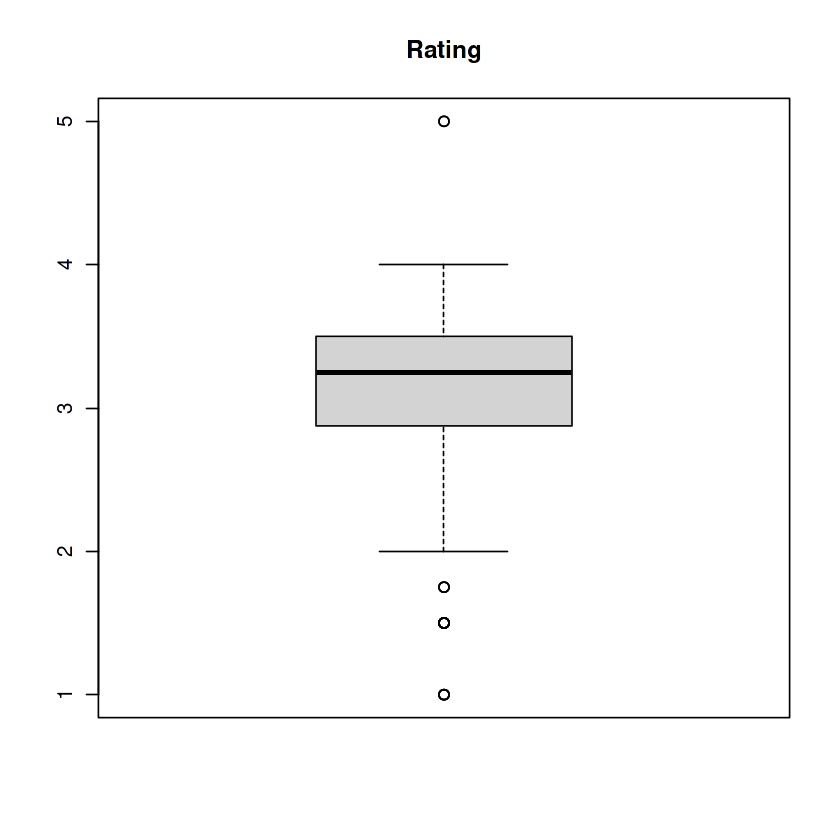

In [24]:
boxplot(chocolate_data$Rating, main = "Rating")

* # Correlation Matrix

To analyze the correlation between numerical variables in the dataset, you can create a correlation matrix and visualize it using a heatmap

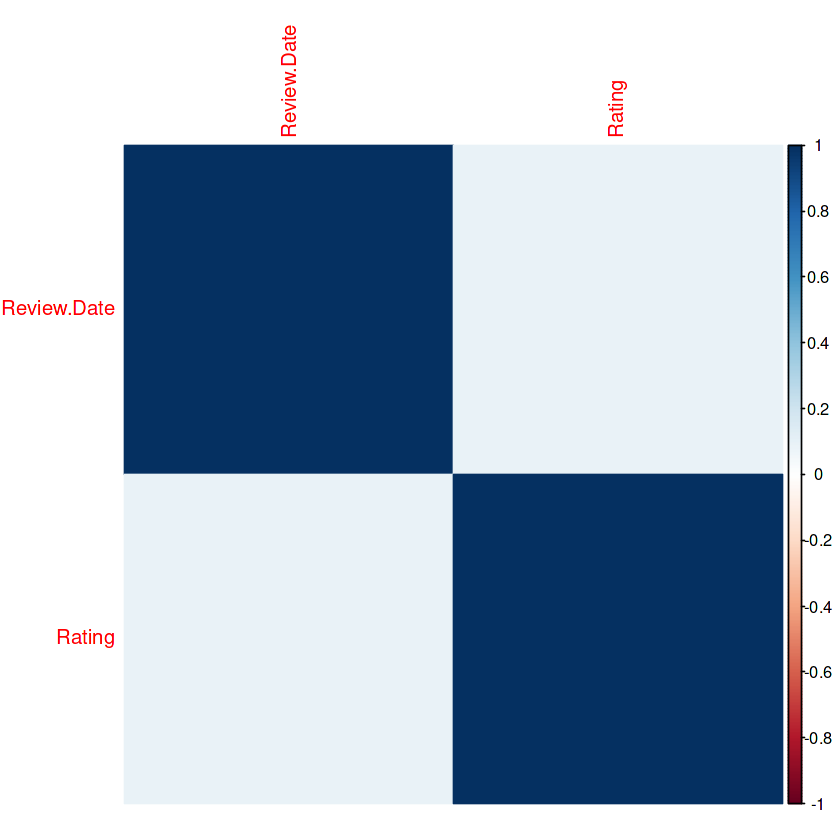

In [25]:
library(corrplot)
numeric_data <- subset(chocolate_data, select = c(Review.Date, Rating))
cor_matrix <- cor(numeric_data)
corrplot(cor_matrix, method = "color")


* # Heatmap

A heatmap can provide a visual representation of the relationships between variables. Creating a heatmap based on the categorical variables 'Specific.Bean.Origin.or.Bar.Name' and 'Broad.Bean.Origin':


Warning message in brewer.pal(length(categories), "Set3"):
“n too large, allowed maximum for palette Set3 is 12
Returning the palette you asked for with that many colors
”


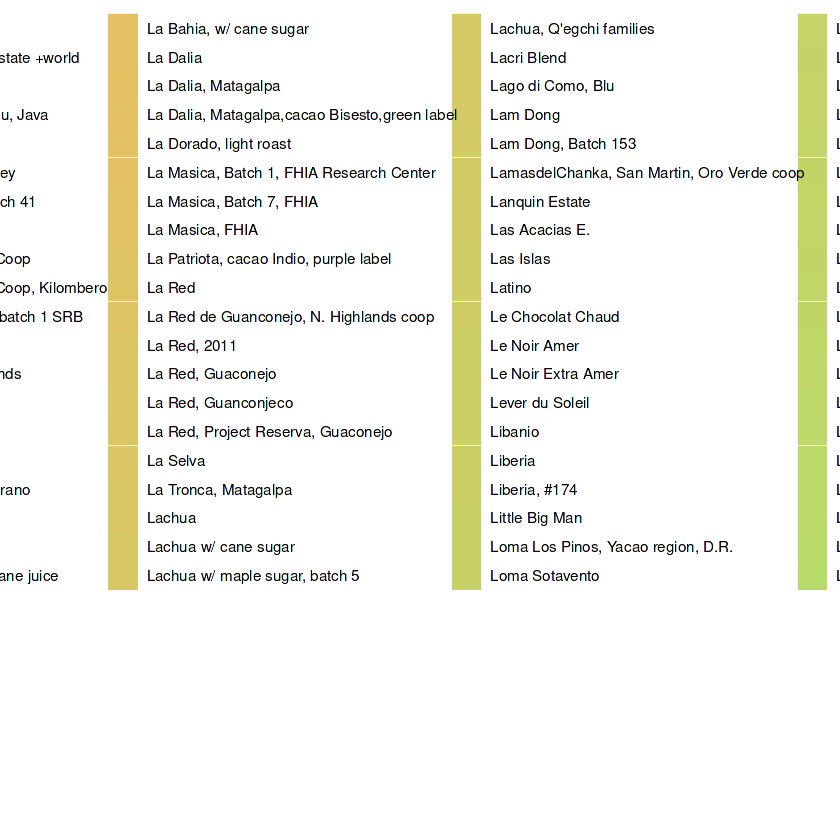

In [26]:
library(ggplot2)
library(dplyr)
library(RColorBrewer)

categorical_data <- select(chocolate_data, Specific.Bean.Origin.or.Bar.Name, Broad.Bean.Origin)
categorical_data$Specific.Bean.Origin.or.Bar.Name <- as.factor(categorical_data$Specific.Bean.Origin.or.Bar.Name)
categorical_data$Broad.Bean.Origin <- as.factor(categorical_data$Broad.Bean.Origin)

# Get the unique categories in Specific.Bean.Origin.or.Bar.Name
categories <- unique(categorical_data$Specific.Bean.Origin.or.Bar.Name)

# Generate a color palette with enough colors for the categories
color_palette <- colorRampPalette(brewer.pal(length(categories), "Set3"))(length(categories))

ggplot(categorical_data, aes(x = Specific.Bean.Origin.or.Bar.Name, y = Broad.Bean.Origin)) +
  geom_tile(aes(fill = Specific.Bean.Origin.or.Bar.Name)) +
  labs(x = "Specific.Bean.Origin.or.Bar.Name", y = "Broad.Bean.Origin") +
  scale_fill_manual(values = color_palette) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


In [27]:
# Identify NaN values in each column
nan_indices <- lapply(chocolate_data, function(x) which(is.nan(x)))

# Replace NaN values with NA
for (col in 1:ncol(chocolate_data)) {
  chocolate_data[nan_indices[[col]], col] <- NA
}

# Remove rows with NA values
clean_dataset <- na.omit(chocolate_data)


# Build a Model

To make predictions on the "rating" and "company_location" variables.We can use machine learning algorithms. Let's start by splitting the dataset into training and testing sets, then apply different algorithms for prediction and visualize the results. By using the popular algorithms: Random Forest.

* ## Splitting the Dataset

We need to split the dataset into a training set and a testing set to evaluate the performance of our prediction models. 

In [28]:
library(caTools)

set.seed(123)  # For reproducibility
split <- sample.split(chocolate_data$Rating, SplitRatio = 0.7)
training_data <- subset(chocolate_data, split == TRUE)
testing_data <- subset(chocolate_data, split == FALSE)


* # Random Forest Model

Random Forest is an ensemble learning algorithm that can be used for both regression and classification tasks. Here's on how to train a Random Forest model to predict the "rating" variable:

In [29]:
library(dplyr)

# Define the objects 'a' and 'b'
a <- c(1, 2, 3)
b <- c(4, 5, 6)

# Use vctrs::vec_c() instead of deprecated combine()
result <- vctrs::vec_c(a, b)


In [31]:
library(randomForest)

rf_model <- randomForest(Rating ~ ., data = training_data)
rf_predictions <- predict(rf_model, newdata = testing_data)

# Using dplyr's combine function
dplyr::combine(a, b)

# Using ggplot2's margin function
ggplot2::margin()


Warning message:
“`combine()` was deprecated in dplyr 1.0.0.
ℹ Please use `vctrs::vec_c()` instead.”


[1] 1 2 3 4 5 6

[1] 0points 0points 0points 0points

In [32]:
library(randomForest)

# Fit the random forest model
rf_model <- randomForest(Rating ~ ., data = training_data)

# Make predictions on the testing data
rf_predictions <- predict(rf_model, newdata = testing_data)

# Display the predictions
print(rf_predictions)


       3        5        8        9       16       18       20       23 
3.366949 3.269875 3.305225 3.322217 3.232349 3.284809 3.305249 3.395653 
      24       27       30       32       36       37       39       40 
3.203583 3.202987 3.096847 3.229260 3.288676 3.197334 3.268820 3.190961 
      48       49       52       55       56       60       64       69 
2.930161 2.864229 3.102482 3.323674 3.316382 3.005129 3.183175 3.264058 
      75       78       79       80       83       92       93      100 
3.319008 2.974977 3.425118 3.209192 3.506896 3.188283 3.248917 3.469327 
     103      105      110      111      113      120      121      124 
3.388361 3.338848 3.428739 3.350137 3.322756 3.294909 3.160108 3.368330 
     125      127      132      133      134      135      136      137 
3.353726 3.324558 3.179550 3.069861 3.031617 3.129592 3.163308 3.129383 
     139      141      152      154      155      156      162      167 
3.417319 3.348121 3.320736 3.378330 3.280677 3.4357

# Visualizing the Results

To visualize the results of the predictions, we can create plots comparing the predicted values to the actual values. Here the Random Forest predictions:

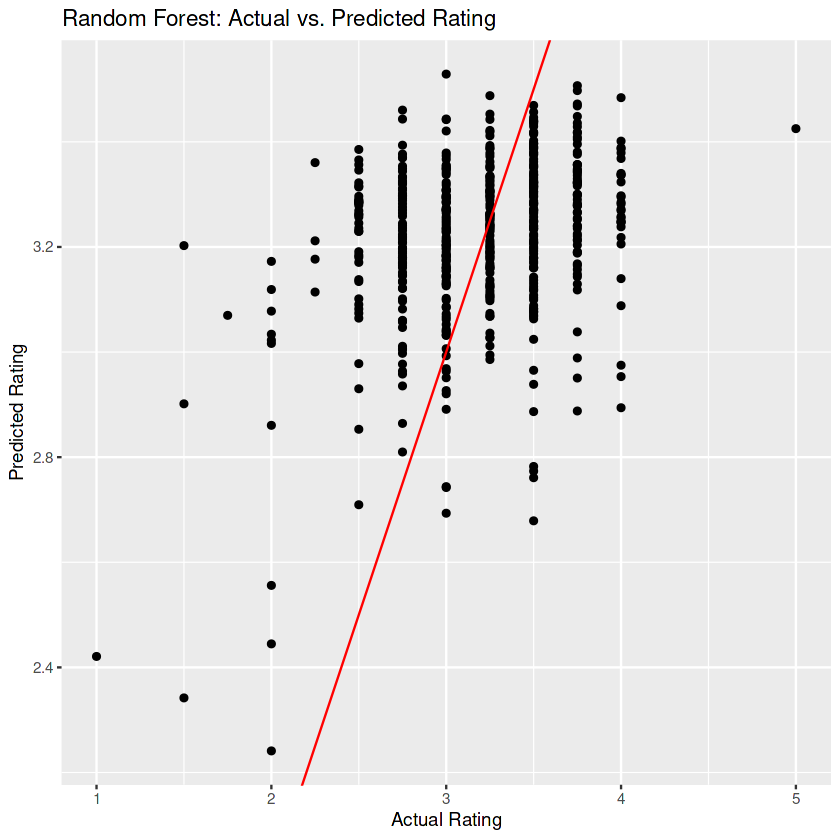

In [33]:
library(ggplot2)

rf_results <- data.frame(actual = testing_data$Rating, predicted = rf_predictions)
ggplot(rf_results, aes(x = actual, y = predicted)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, color = "red") +
  labs(x = "Actual Rating", y = "Predicted Rating") +
  ggtitle("Random Forest: Actual vs. Predicted Rating")


![image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-eV-vDP0_ZcP9GxCEzJFBzAoffWM8zVlwQw&usqp=CAU)

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
Your upvote is a great way to show your support and help others discover this valuable resource.
Please share your comments and suggestions

<div class="alert alert-block alert-info"> 📌 Note: If you fork my notebook, please don't forget to upvote it. </div>
